In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


features = ["Sex", "Pclass", "SibSp", "Parch", "Age", "Embarked"]
# for dirname, _, filenames in os.walk('../titanic/data'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
def get_training_data():
    train_data = pd.read_csv("../titanic/data/train.csv")
    return train_data

def get_test_data():
    test_data = pd.read_csv("../titanic/data/test.csv")
    return test_data

def divide_data(train_data, test_data):
    y = train_data["Survived"]
    X = pd.get_dummies(train_data[features])
    X_test = pd.get_dummies(test_data[features])
    return y, X, X_test

In [3]:
train_data = get_training_data()
test_data = get_test_data()

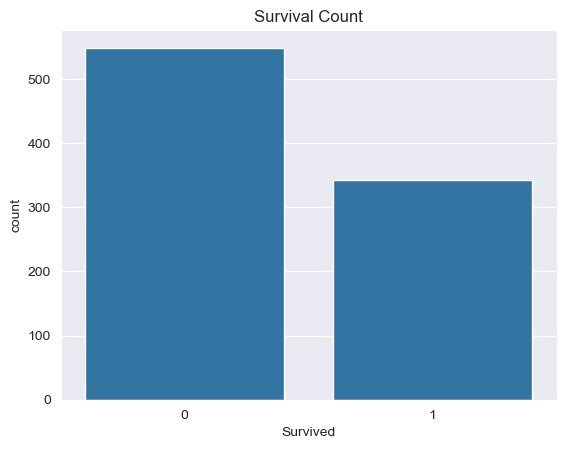

In [4]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

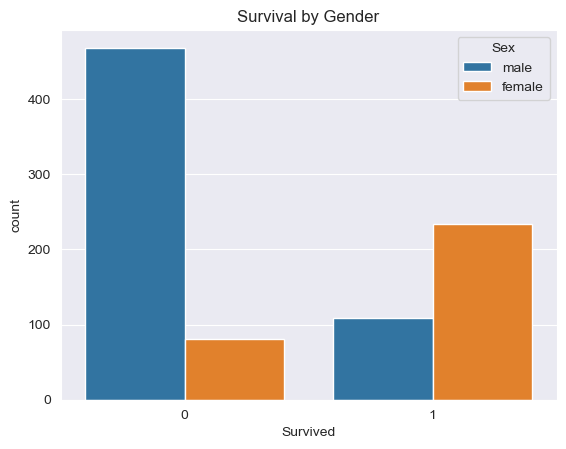

In [5]:
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.title('Survival by Gender')
plt.show()

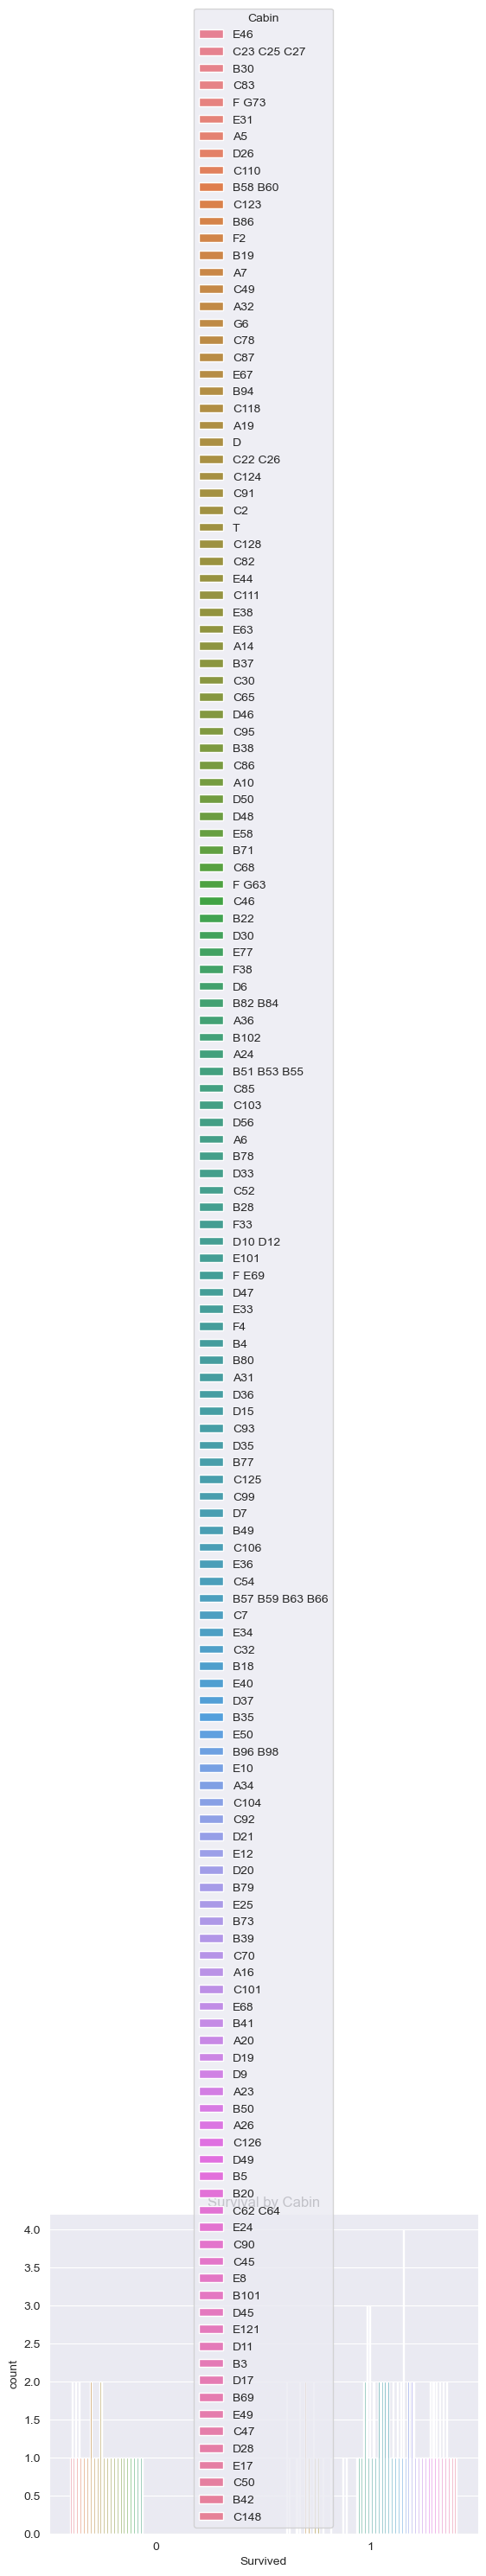

In [6]:
sns.countplot(x='Survived', hue='Cabin', data=train_data)
plt.title('Survival by Cabin')
plt.show()

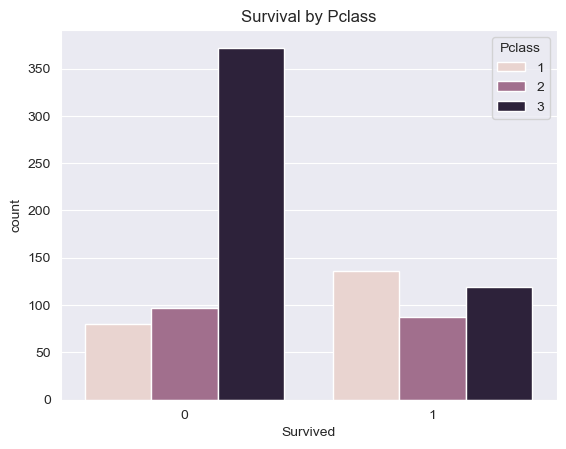

In [7]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.title('Survival by Pclass')
plt.show()

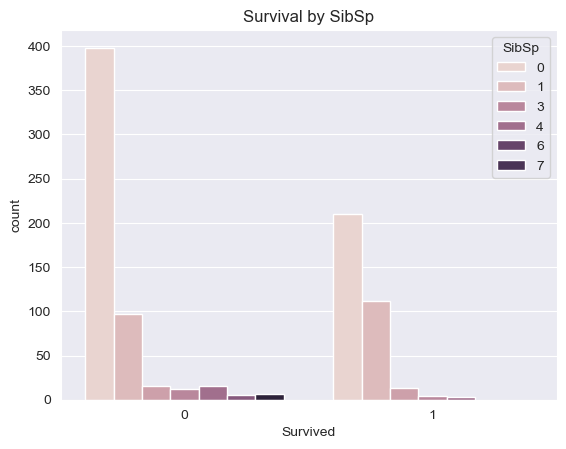

In [8]:
sns.countplot(x='Survived', hue='SibSp', data=train_data)
plt.title('Survival by SibSp')
plt.show()

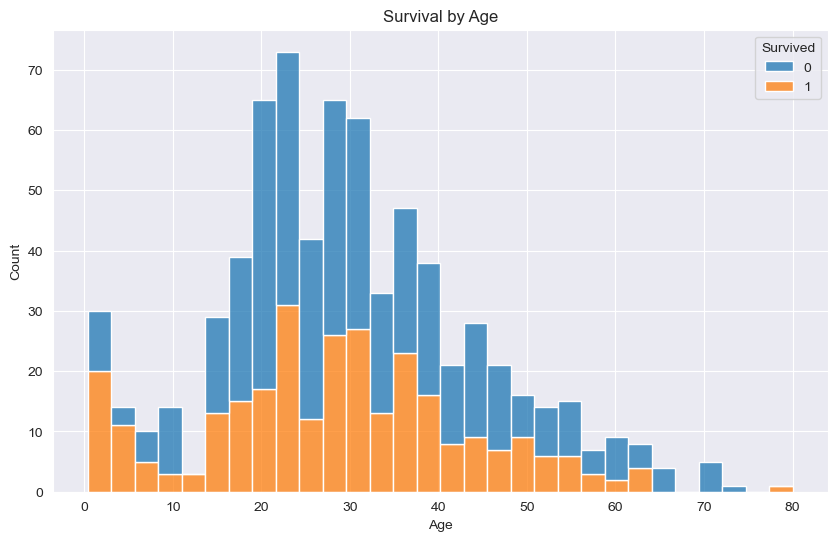

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', bins=30, kde=False, multiple="stack")
plt.title('Survival by Age')
plt.show()

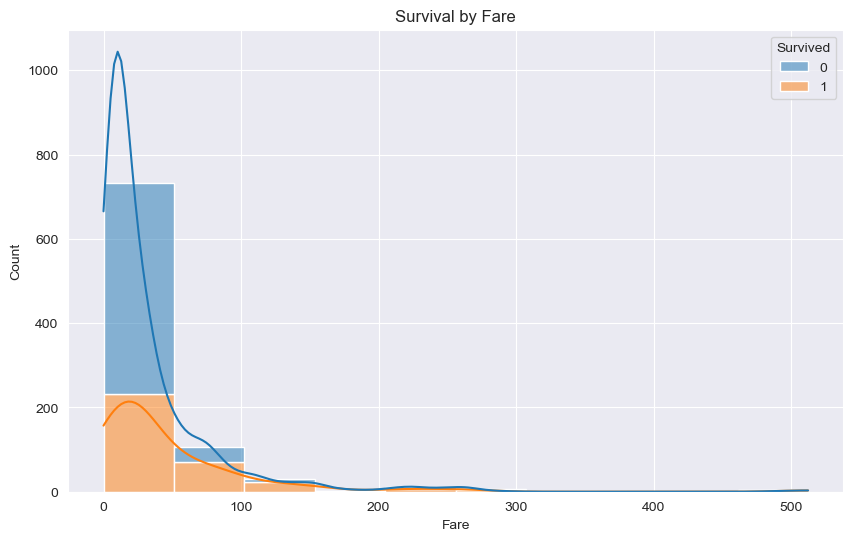

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=10, kde=True, multiple="stack")
plt.title('Survival by Fare')
plt.show()

In [11]:
train_data.isnull().sum()
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

train_data['Embarked'] = le.fit_transform(train_data['Embarked'])
test_data['Embarked'] = le.transform(test_data['Embarked'])

train_data['Sex'] = le.fit_transform(train_data['Sex'])
test_data['Sex'] = le.transform(test_data['Sex'])

# train_data['Fm'] = train_data['SibSp'] + train_data['Parch']
# test_data['Fm'] = test_data['SibSp'] + test_data['Parch']


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data[['Age','Fare']] = scaler.fit_transform(train_data[['Age','Fare']])
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data.isnull().sum()

/var/folders/qd/v5ry5_cj447fbwhs1jj9bgqh0000gn/T/ipykernel_54901/3926568158.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
train_data = train_data.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'],axis=1)
test_data = test_data.drop(['Name','Ticket','Cabin'],axis=1)
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

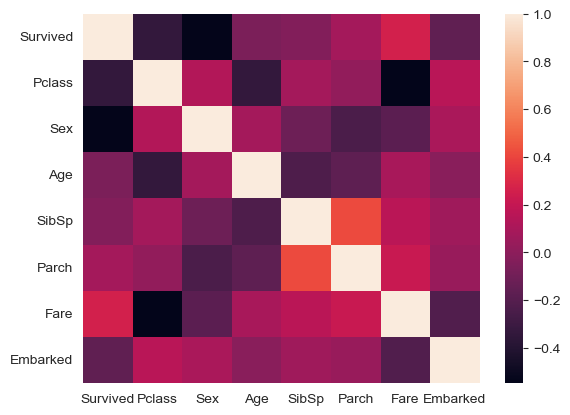

In [15]:
sns.heatmap(data=train_data.corr())

In [16]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
# train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
# test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# train_data['Sex'].fillna(train_data['Sex'].median(), inplace=True)
# test_data['Sex'].fillna(test_data['Sex'].median(), inplace=True)

In [26]:

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


def get_model():
    rfm = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
    gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
    xgbm = XGBClassifier(n_estimators=100, learning_rate=0.2, random_state=42)
    return rfm, gbm, xgbm

def train(model, X, y):
    model.fit(X, y)

def predict(model, X_test, test_data, submissions_file_name):
    predictions = model.predict(X_test)
    output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
    output.to_csv(submissions_file_name, index=False)

In [28]:

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


def run():
    y = train_data['Survived']
    X = train_data.drop('Survived', axis=1)
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=7)
    
    rfm, gbm,xgm = get_model()
    model = xgm
    train(model, X_train, y_train)
    y_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred)
    print("acc", val_accuracy)
    
    # final_m,_ = get_model()
    # train(final_m, X, y)
    
    X_test = test_data.drop(['PassengerId'], axis=1)
    predict(model, X_test, test_data, 'sixth_submission.csv')
print("Your submission was successfully saved!")
run()

Your submission was successfully saved!
acc 0.7932960893854749
